In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

In [89]:
df = pd.read_csv("/content/drive/MyDrive/Google Colab/datasets/netflixMovieDataset.csv", encoding= "latin1")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       584 non-null    object 
 1   genre       584 non-null    object 
 2   premiere    584 non-null    object 
 3   runtime     584 non-null    int64  
 4   imdb score  584 non-null    float64
 5   language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [60]:
# genre split into columns

#df['genre1'] = df.genre.apply(lambda x : x.split("/")[0])
#df['genre2'] = df.genre.apply(lambda x : x.split("/")[1] if len(x.split("/")) == 2 else None)
#df['genre3'] = df.genre.apply(lambda x : x.split("/")[2] if len(x.split("/")) == 3 else None)

# language split into columns

#df['language1'] = df.language.apply(lambda x : x.split("/")[0])
#df['language2'] = df.language.apply(lambda x : x.split("/")[1] if len(x.split("/")) == 2 else None)
#df['language3'] = df.language.apply(lambda x : x.split("/")[2] if len(x.split("/")) == 3 else None)

# date split into columns
#df["date_release"] = df.premiere.apply(lambda x: x.replace(",",""))
#df['year_release'] = df.premiere.apply(lambda x : x.split(" ")[2])
#df['month_release'] = df.premiere.apply(lambda x : x.split(" ")[0])


In [62]:
#df.drop(['language','premiere'], axis = 1, inplace = True)

In [91]:
df.head()

,date_release,title,day_release,month_release,year_release,runtime,imdb score,genre1,genre2,language1,language2
0,October 4 2020,David Attenborough: A Life on Our Planet,Sunday,October,2020,83,9.0,Documentary,NaN,English,NaN
1,December 8 2020,Emicida: AmarElo - It's All For Yesterday,Tuesday,December,2020,89,8.6,Documentary,NaN,Portuguese,NaN
2,December 16 2018,Springsteen on Broadway,Sunday,December,2018,153,8.5,Musical,NaN,English,NaN
3,October 9 2015,Winter on Fire: Ukraine's Fight for Freedom,Friday,October,2015,91,8.4,Documentary,NaN,English,Russian
4,December 31 2018,Taylor Swift: Reputation Stadium Tour,Monday,December,2018,125,8.4,Documentary,NaN,English,NaN


In [57]:
#df.to_csv("netflixMovieDataset.csv")

In [93]:
day = df.day_release

wkendCond = (day == "Sunday")|(day == "Saturday")
#dividing the df into weekends and weekdays

weekday = lambda x: x in ["Monday","Tuesday","Wednesday","Thursday","Friday"]
wkdayCond = day.apply(weekday)

In [97]:
#Week End Data sort 

wkendRel = df.loc[wkendCond]
wkdayRel = df.loc[wkdayCond]

**Note: No correlation when it comes to runtime and imdb score**

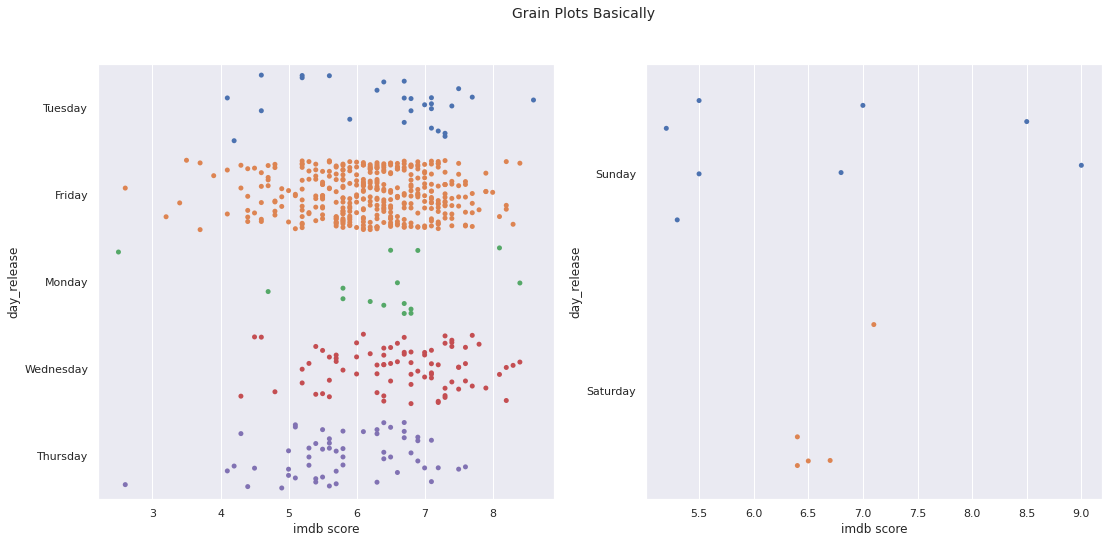

In [99]:
fig,axes = plt.subplots(1,2, figsize = (18,8))
fig.suptitle('Grain Plots Basically', fontsize = 14)
sb.set_theme(style= "whitegrid")
sb.stripplot(ax=axes[0],x = wkdayRel['imdb score'], y = wkdayRel.day_release, jitter = 0.4, orient = "h");

sb.stripplot(ax=axes[1],x = wkendRel['imdb score'], y = wkendRel.day_release, jitter = 0.4, orient = "h");

In [120]:
genre_value_count = df.genre1.value_counts()
topGenre = genre_value_count.iloc[:12].index
otherGenre = genre_value_count.iloc[13:].index

In [124]:
print(topGenre)
print(otherGenre)

Index(['Documentary', 'Drama', 'Comedy', 'Thriller', 'RomCom', 'Action',
       'Romance', 'Horror', 'Animation', 'Dramedy', 'SciFi', 'Biography'],
      dtype='object')
Index(['Family', 'Crime', 'Adventure', 'Western', 'Fantasy', 'War', 'Mystery'], dtype='object')


In [131]:


# defining lambda functions 
top_genre = lambda x: True if x in topGenre else False
other_genre = lambda x: True if x in otherGenre else False

tgenreMovie = df.loc[df.genre1.apply(top_genre)]
othgenreMovie = df.loc[df.genre1.apply(other_genre)]

In [155]:
genre1 = df.genre1.apply(top_genre)
genre2 = df.genre2.apply(top_genre)

genreTop =df.loc[genre1]

genre1 = df.genre1.apply(other_genre)
genre2 = df.genre2.apply(other_genre)

genreOther = pd.concat([df.loc[genre1],df.loc[genre2]], axis = 0)

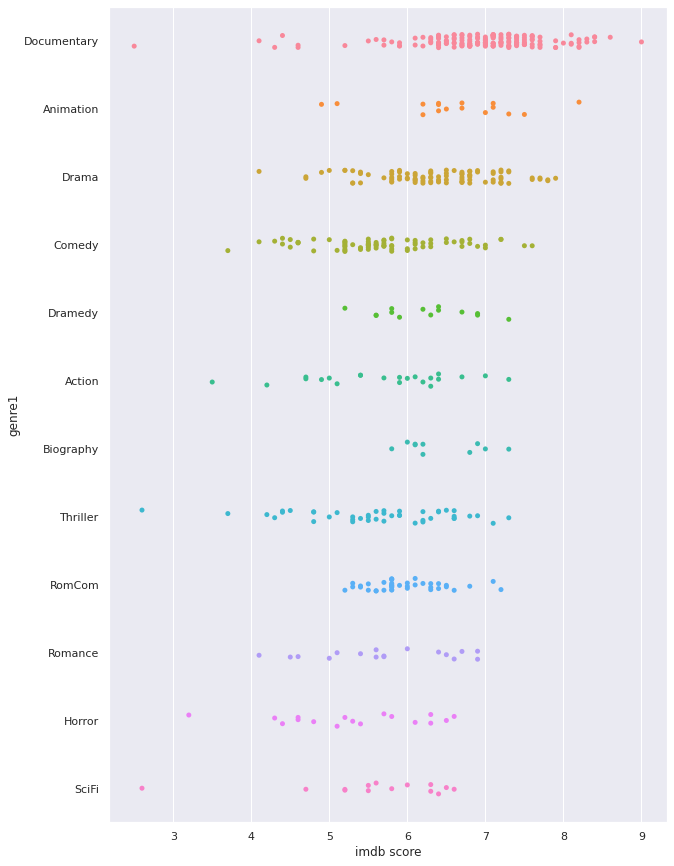

In [154]:
fig = plt.figure(figsize = (10,15))
sb.set_theme(style= "darkgrid")
sb.stripplot(x=genreTop['imdb score'], y=genreTop.genre1, orient = "h" );
#sb.stripplot(axxes[1],x = othgenreMovie["imdb score"], y=othgenreMovie.genre1,orient = "h" );
#sb.boxplot(ax= axes[0] ,x = tgenreMovie["imdb score"], y=tgenreMovie.genre1,orient = "h")
#sb.boxplot(ax = axes[1],x = othgenreMovie["imdb score"], y = othgenreMovie.genre1, orient = "h")

**The major genre's of movies are Documentaries, RomComs, Comdies and Dramas. Of which the ratings of documentaries are higher than the ratings of other genres.**


***Since there are two types of films to choose from when it comes to entertainment, let's seperate Movies from the Documentaries that are released on Netflix since 2014***


---



In [161]:
docu_data = df.loc[df.genre1 == "Documentary"]
movie_data = df.loc[df.genre2 != "Documentary"]
print(docu_data.shape,movie_data.shape)

(169, 11) (571, 11)


In [ ]:
eng_movie_data = df.loc[df.language1 =="English"]
noneng_movie_data = df.loc[df.language1 != "English"]
print(eng_movie_data.shape,noneng_movie_data.shape)